<a href="https://colab.research.google.com/github/MididoddiSindhu05/Image-Denoising/blob/main/Image2hdr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

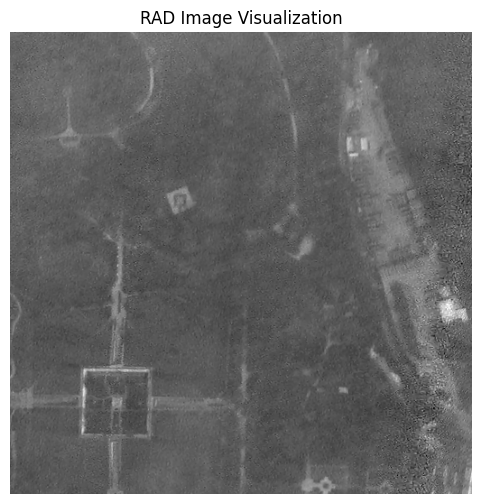

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import cv2


hdr_path = '/content/band1_image2.rad.hdr'

header_info = {}
with open(hdr_path, 'r') as f:
    for line in f:
        if '=' in line:
            key, value = line.strip().split('=')
            header_info[key.strip().lower()] = value.strip()

width = int(header_info['samples'])
height = int(header_info['lines'])

rad_path = '/content/band1_image2.rad'
image_data = np.fromfile(rad_path, dtype=np.uint16)


image = image_data.reshape((height, width))


image_8bit = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

plt.figure(figsize=(8, 6))
plt.imshow(image_8bit, cmap='gray')
plt.title('RAD Image Visualization')
plt.axis('off')
plt.show()


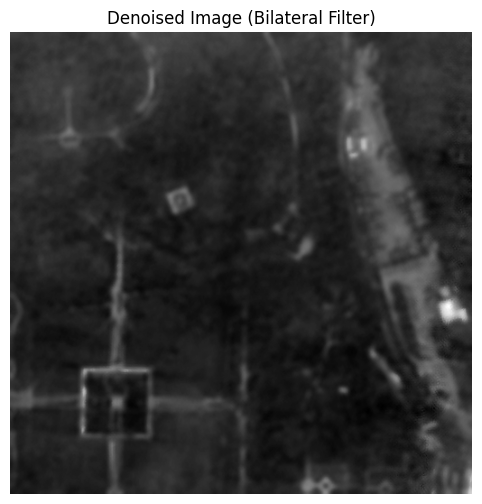

In [2]:
import cv2
import matplotlib.pyplot as plt

# Bilateral Filtering
denoised = cv2.bilateralFilter(image_8bit, d=9, sigmaColor=75, sigmaSpace=75)

plt.figure(figsize=(8, 6))
plt.imshow(denoised, cmap='gray')
plt.title('Denoised Image (Bilateral Filter)')
plt.axis('off')
plt.show()